# Projet Machine-Learning par Antoine Théologien
## Test d'un réseau de neurones à deux couches

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *

def train_nn(X, y, model, loss, epochs=1000, lr=0.1, batch_size=16):
    losses = []
    n = X.shape[0]  
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)  
        X_shuffled, y_shuffled = X[indices], y[indices]

        epoch_loss = 0
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_hat = model.forward(X_batch)
            batch_loss = np.mean(loss.forward(y_batch, y_hat))
            epoch_loss += batch_loss * len(X_batch) / n 

            model.zero_grad()
            model.backward(X_batch, y_batch, loss)
            model.update_parameters(lr)

        losses.append(epoch_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}")

    return losses, model



Epoch 0: Loss = 0.0335
Epoch 100: Loss = 0.0004
Epoch 200: Loss = 0.0002
Epoch 300: Loss = 0.0001
Epoch 400: Loss = 0.0001


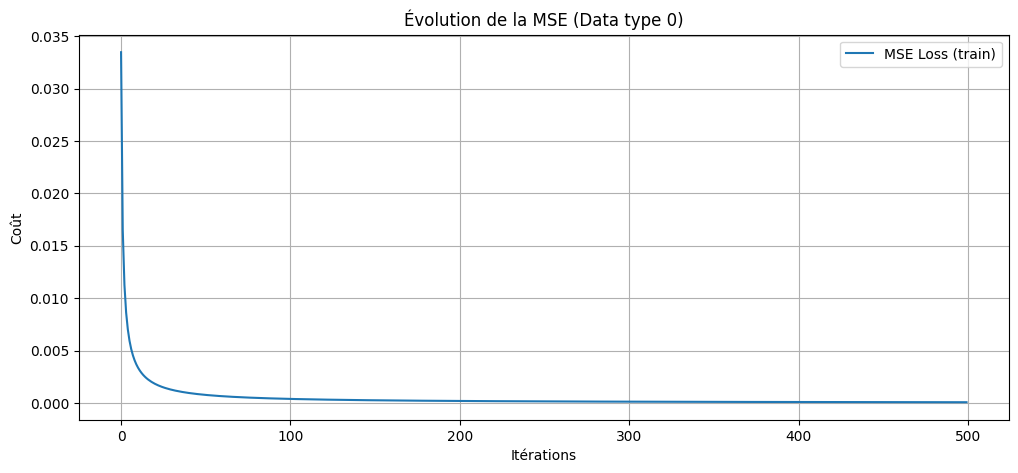

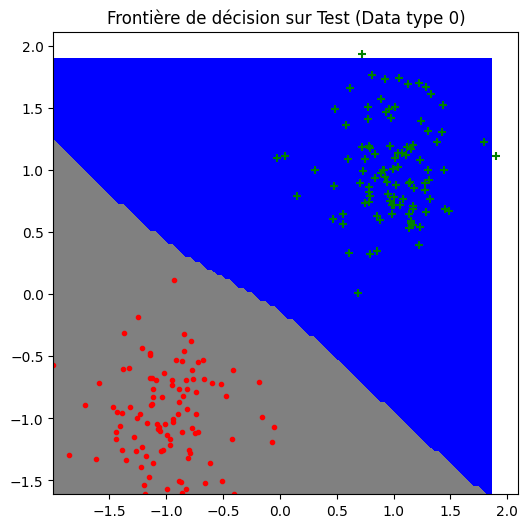

Test Loss (Data type 0): 0.0001
Epoch 0: Loss = 0.2651
Epoch 100: Loss = 0.0063
Epoch 200: Loss = 0.0046
Epoch 300: Loss = 0.0039
Epoch 400: Loss = 0.0035


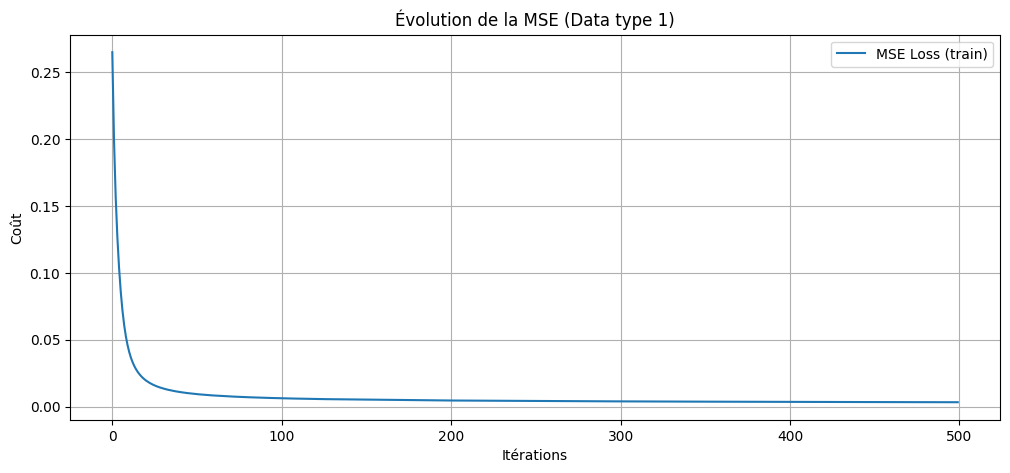

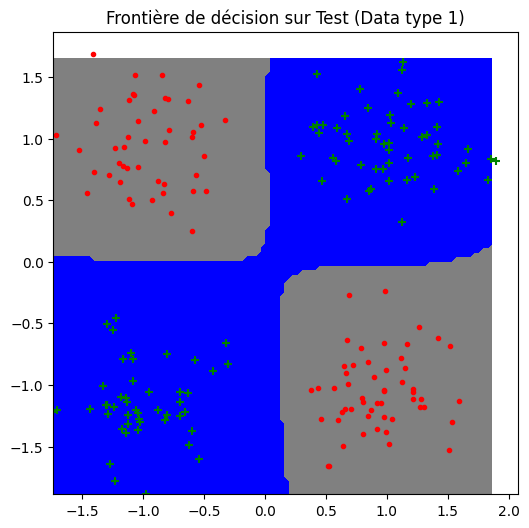

Test Loss (Data type 1): 0.0012
Epoch 0: Loss = 0.3171
Epoch 100: Loss = 0.2472
Epoch 200: Loss = 0.2469
Epoch 300: Loss = 0.2465
Epoch 400: Loss = 0.2465


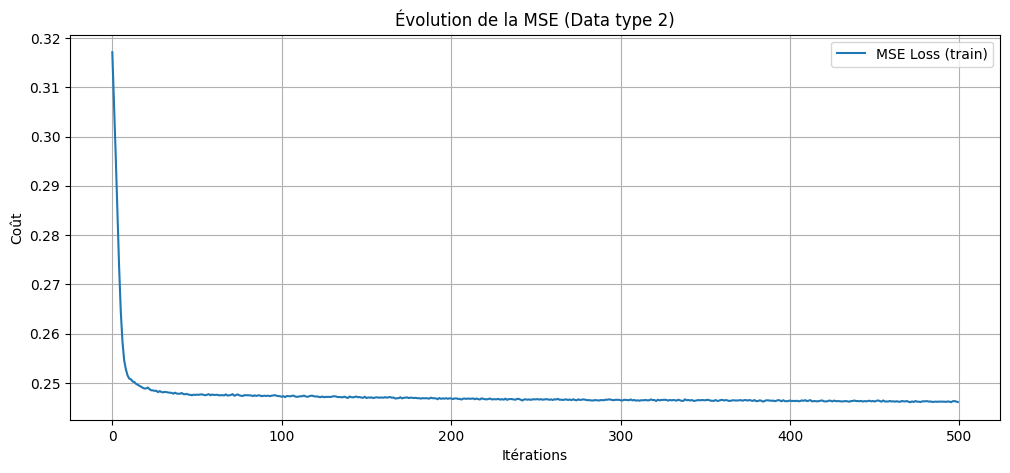

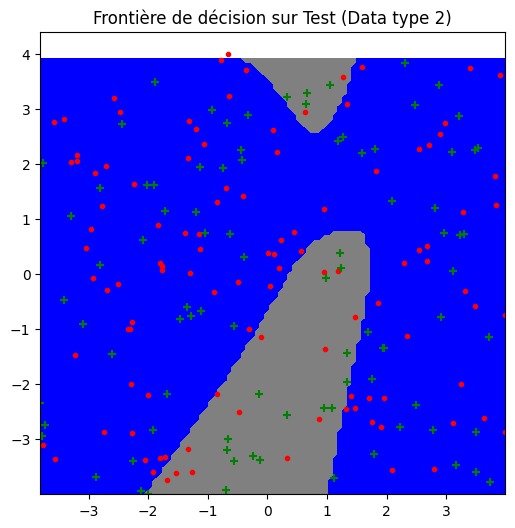

Test Loss (Data type 2): 0.2609


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = np.where(datay == -1, 0, 1).reshape((-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    model = SimpleNN(input_dim=2, hidden_dim=5, output_dim=1)
    loss = MSELoss()

    losses, trained_model = train_nn(X_train, y_train, model, loss, epochs=500, lr=0.05, batch_size=16)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.figure(figsize=(12, 5))
    plt.plot(losses, label="MSE Loss (train)")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision sur Test (Data type {i})")
    plt.show()

    print(f"Test Loss (Data type {i}): {test_loss:.4f}")
